In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 200 files belonging to 2 classes.


Found 200 files belonging to 2 classes.


In [5]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [8]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
7/7 [==============================] - 42s 5s/step - loss: 7.5572 - accuracy: 0.5350 - val_loss: 0.7155 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 36s 5s/step - loss: 3.4010 - accuracy: 0.7100 - val_loss: 0.9768 - val_accuracy: 0.5050
Epoch 3/10
7/7 [==============================] - 36s 5s/step - loss: 3.2142 - accuracy: 0.7550 - val_loss: 1.6001 - val_accuracy: 0.4650
Epoch 4/10
7/7 [==============================] - 40s 6s/step - loss: 2.1400 - accuracy: 0.8250 - val_loss: 5.3668 - val_accuracy: 0.5000
Epoch 5/10
7/7 [==============================] - 34s 5s/step - loss: 1.1159 - accuracy: 0.8800 - val_loss: 7.8247 - val_accuracy: 0.5000
Epoch 6/10
7/7 [==============================] - 34s 5s/step - loss: 0.8725 - accuracy: 0.8700 - val_loss: 5.0582 - val_accuracy: 0.5000
Epoch 7/10
7/7 [==============================] - 33s 5s/step - loss: 0.3016 - accuracy: 0.9400 - val_loss: 6.0902 - val_accuracy: 0.5000
Epoch 8/10
7/7 [==================

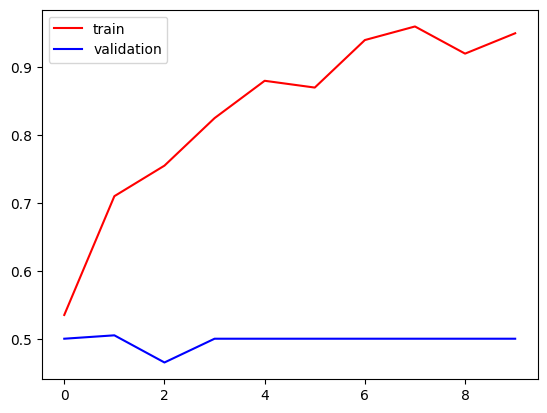

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

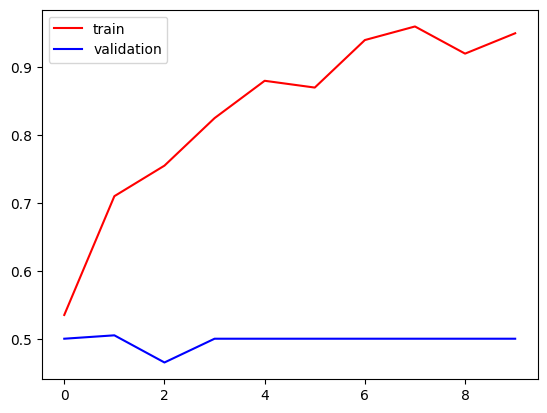

In [11]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

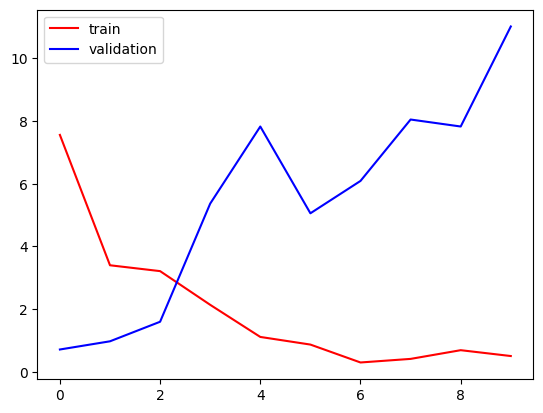

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

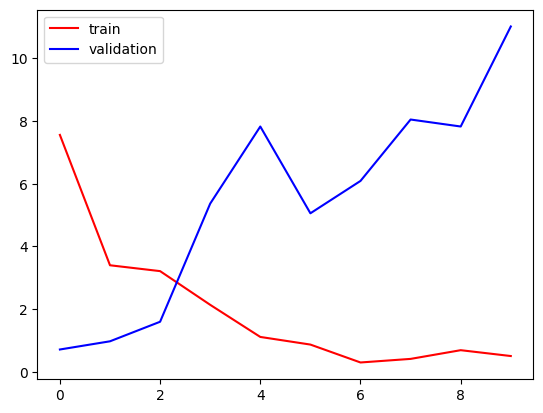

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [32]:
import cv2

In [42]:
test_img=cv2.imread('dog.jpg')

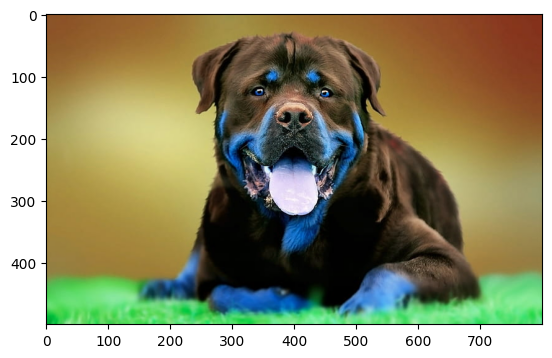

In [43]:
plt.imshow(test_img)

In [44]:
test_img.shape

(500, 800, 3)

In [45]:
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
ans=model.predict(test_input,verbose=0)
cat=ans[0][0]
if cat==0:
    print("Input image is of a cat")
else : 
    print("Input image is of a dog")

Input image is of a dog
